In [1]:
# !pip install matplotlib
# !pip install nb_black
%load_ext nb_black
%matplotlib inline
from matplotlib import style

style.use("fivethirtyeight")
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

<IPython.core.display.Javascript object>

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

<IPython.core.display.Javascript object>

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

<IPython.core.display.Javascript object>

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

<IPython.core.display.Javascript object>

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

<IPython.core.display.Javascript object>

In [7]:
# Save references to each table
session = Session(engine)

<IPython.core.display.Javascript object>

In [8]:
# Create our session (link) from Python to the DB
Measurement = Base.classes.measurement
Station = Base.classes.station

<IPython.core.display.Javascript object>

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = (
    session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
)
latest_date

'2017-08-23'

<IPython.core.display.Javascript object>

In [31]:
prev_date = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)
prev_date

datetime.datetime(2016, 8, 23, 0, 0)

<IPython.core.display.Javascript object>

In [39]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

prev_results = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= prev_date)
    .order_by(Measurement.date.asc())
    .all()
)
df = pd.DataFrame(prev_results, columns=["Date", "Precipitation"])
df = df.set_index("Date")
df

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<IPython.core.display.Javascript object>

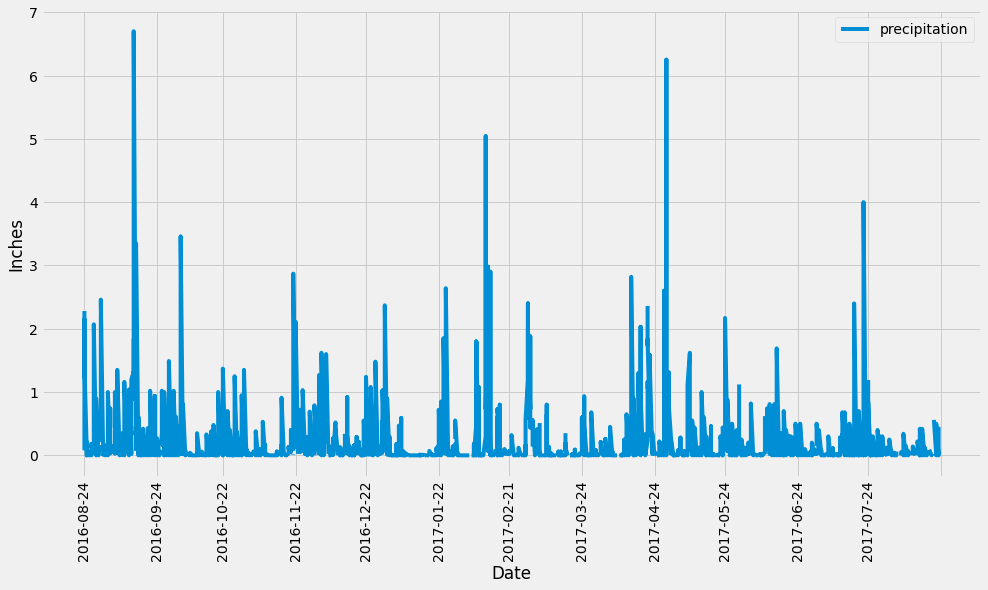

<IPython.core.display.Javascript object>

In [71]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df.index.values, df["Precipitation"].values, label="precipitation")
ax.set(xlabel="Date", ylabel="Inches")
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [45]:
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<IPython.core.display.Javascript object>

# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

<IPython.core.display.Javascript object>

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
s_results = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
s_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

<IPython.core.display.Javascript object>

In [79]:
s_results[0][0]

'USC00519281'

<IPython.core.display.Javascript object>

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = s_results[0][0]
session.query(
    func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)
).filter(Measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

<IPython.core.display.Javascript object>

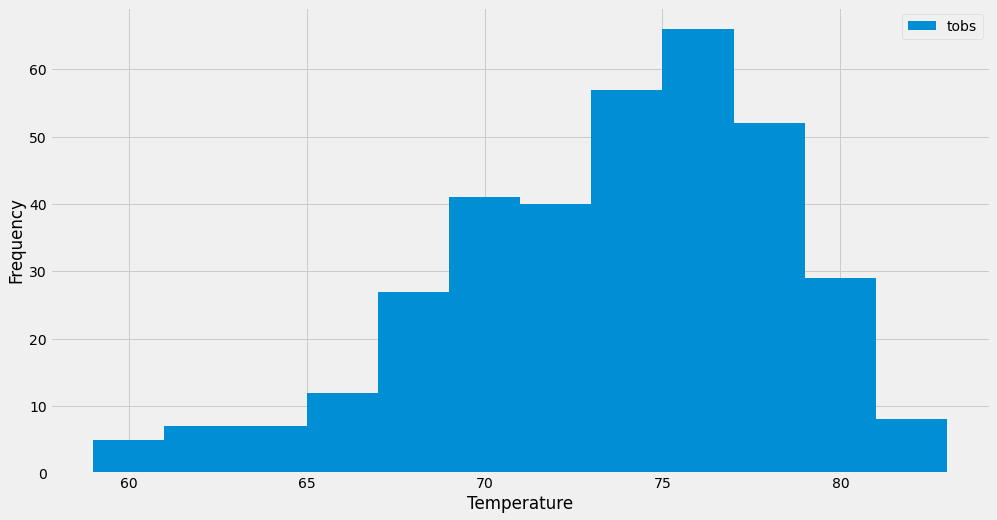

<IPython.core.display.Javascript object>

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_results = (
    session.query(Measurement.station, Measurement.tobs)
    .filter(Measurement.station == best_station)
    .filter(Measurement.date >= prev_date)
    .all()
)
df2 = pd.DataFrame(t_results)
df2.plot(kind="hist", figsize=(15, 8), bins=12)
a = plt.legend()
a.get_texts()[0].set_text("tobs")
plt.xlabel("Temperature")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()